In [1]:
suppressMessages(source("../config_sing.R"))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect 


In [2]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")
fname = "dat_mu_var.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_mu_var = dat
print(dim(dat))
head(dat)

Rows: 2911211 Columns: 10
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Group
dbl (8): Start, End, Cpm_Mean, Cpm_Var, Cpm_Std, Cnt_Mean, Cnt_Var, Cnt_Std

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 2911211      10


Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,69200,70200,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69300,70300,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69400,70400,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69500,70500,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69600,70600,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69700,70700,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA


In [3]:
fdiry = file.path(FD_RES, "sliding_window")
fname = "sliding_chr17_len_1kb_gap_100bp.nuc.bed.gz"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)
colnames(dat)[1:3] = colnames(dat_mu_var)[1:3]

dat_win_nuc = dat
head(dat)

Rows: 832565 Columns: 12
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): #1_usercol
dbl (11): 2_usercol, 3_usercol, 4_pct_at, 5_pct_gc, 6_num_A, 7_num_C, 8_num_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Chrom,Start,End,4_pct_at,5_pct_gc,6_num_A,7_num_C,8_num_G,9_num_T,10_num_N,11_num_oth,12_seq_len
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,0,1000,0,0,0,0,0,0,1000,0,1000
chr17,100,1100,0,0,0,0,0,0,1000,0,1000
chr17,200,1200,0,0,0,0,0,0,1000,0,1000
chr17,300,1300,0,0,0,0,0,0,1000,0,1000
chr17,400,1400,0,0,0,0,0,0,1000,0,1000
chr17,500,1500,0,0,0,0,0,0,1000,0,1000


In [21]:
dat = dat_mu_var
dat = dat %>% na.omit
dat = dat %>% mutate(
    Log_Cnt_Mean = log10(Cnt_Mean), 
    Log_Cnt_Var = log10(Cnt_Var))

dat = right_join(dat_win_nuc, dat, by=c("Chrom", "Start", "End"))

dat$grp_gc = cut(dat$`5_pct_gc`, breaks = seq(0, 1, by=0.1))

dat_comb = dat
print(dim(dat))
head(dat)

[1] 2837838      22


Chrom,Start,End,4_pct_at,5_pct_gc,6_num_A,7_num_C,8_num_G,9_num_T,10_num_N,⋯,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std,Log_Cnt_Mean,Log_Cnt_Var,grp_gc
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
chr17,151600,152600,0.433,0.567,201,305,262,232,0,⋯,TFX_Dex,0.022827400,1.304226e-06,0.0011420272,0.8308179,0.001727634,0.04156481,-0.08049416,-2.762548,"(0.5,0.6]"
chr17,151700,152700,0.426,0.574,219,308,266,207,0,⋯,TFX_Dex,0.022827400,1.304226e-06,0.0011420272,0.8308179,0.001727634,0.04156481,-0.08049416,-2.762548,"(0.5,0.6]"
chr17,151800,152800,0.439,0.561,233,300,261,206,0,⋯,TFX_Dex,0.022827400,1.304226e-06,0.0011420272,0.8308179,0.001727634,0.04156481,-0.08049416,-2.762548,"(0.5,0.6]"
chr17,151900,152900,0.453,0.547,243,288,259,210,0,⋯,Input_20x,0.002674966,1.317234e-07,0.0003629372,0.9733612,0.017441119,0.13206483,-0.01172598,-1.758426,"(0.5,0.6]"
chr17,151900,152900,0.453,0.547,243,288,259,210,0,⋯,TFX_Dex,0.022827400,1.304226e-06,0.0011420272,0.8308179,0.001727634,0.04156481,-0.08049416,-2.762548,"(0.5,0.6]"
chr17,152000,153000,0.456,0.544,241,277,267,215,0,⋯,Input_20x,0.002674966,1.317234e-07,0.0003629372,0.9733612,0.017441119,0.13206483,-0.01172598,-1.758426,"(0.5,0.6]"


In [22]:
tail(dat)

Chrom,Start,End,4_pct_at,5_pct_gc,6_num_A,7_num_C,8_num_G,9_num_T,10_num_N,⋯,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std,Log_Cnt_Mean,Log_Cnt_Var,grp_gc
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
chr17,83245300,83246300,0.616,0.384,302,156,228,314,0,⋯,Input_20x,0.014772034,6.239719e-05,0.007899189,5.375217,8.261835,2.874341,0.7303960,0.9170765,"(0.3,0.4]"
chr17,83245400,83246400,0.632,0.368,301,150,218,331,0,⋯,Input_20x,0.014772034,6.239719e-05,0.007899189,5.375217,8.261835,2.874341,0.7303960,0.9170765,"(0.3,0.4]"
chr17,83245500,83246500,0.650,0.350,303,152,198,347,0,⋯,Input_20x,0.014772034,6.239719e-05,0.007899189,5.375217,8.261835,2.874341,0.7303960,0.9170765,"(0.3,0.4]"
chr17,83245600,83246600,0.657,0.343,301,145,198,356,0,⋯,Input_20x,0.013178888,7.279563e-05,0.008532036,4.795507,9.638663,3.104620,0.6808345,0.9840168,"(0.3,0.4]"
chr17,83245700,83246700,0.661,0.339,297,146,193,364,0,⋯,Input_20x,0.008730527,3.609241e-05,0.006007696,3.176846,4.778894,2.186068,0.5019962,0.6793274,"(0.3,0.4]"
chr17,83245800,83246800,0.653,0.347,285,146,201,368,0,⋯,Input_20x,0.005606568,2.032971e-05,0.004508848,2.040106,2.691799,1.640670,0.3096528,0.4300426,"(0.3,0.4]"


## Plot

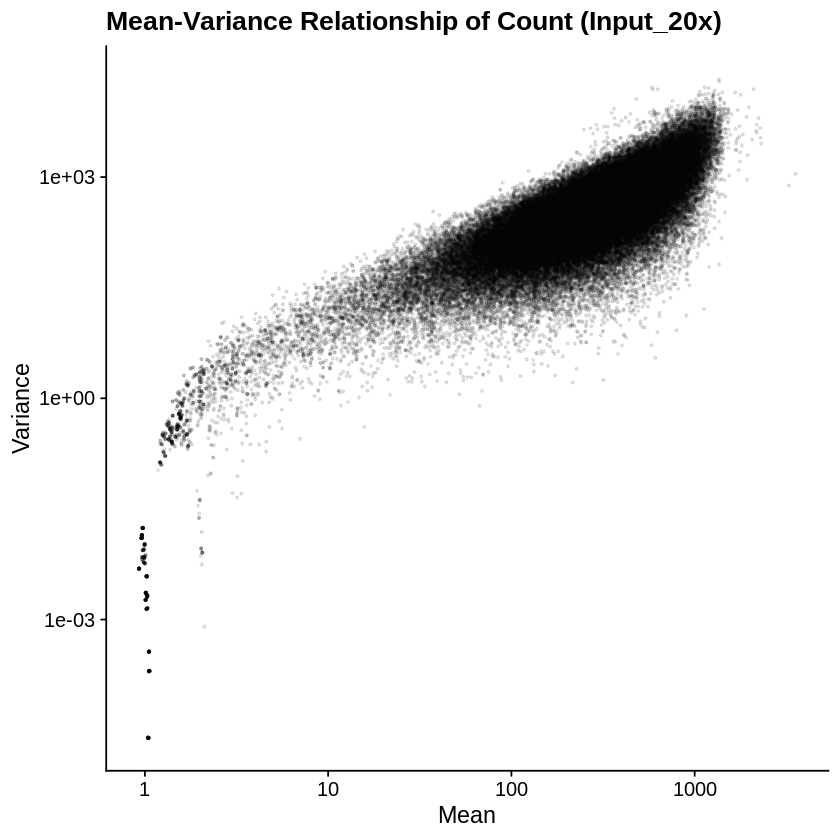

In [9]:
###
dat = dat_comb
dat = dat %>% dplyr::filter(Group=="Input_20x")

###
set.seed(123)
dat = dat %>% dplyr::sample_n(size=100000)

###
gpt = ggplot(dat, aes(x=Cnt_Mean, y=Cnt_Var)) + 
    geom_point(size=0.5, alpha=0.1) + 
    scale_x_log10() + 
    scale_y_log10() +
    theme_cowplot() + 
    labs(x="Mean", y="Variance", title="Mean-Variance Relationship of Count (Input_20x)")

options(repr.plot.height=7, repr.plot.width=7)
print(gpt)

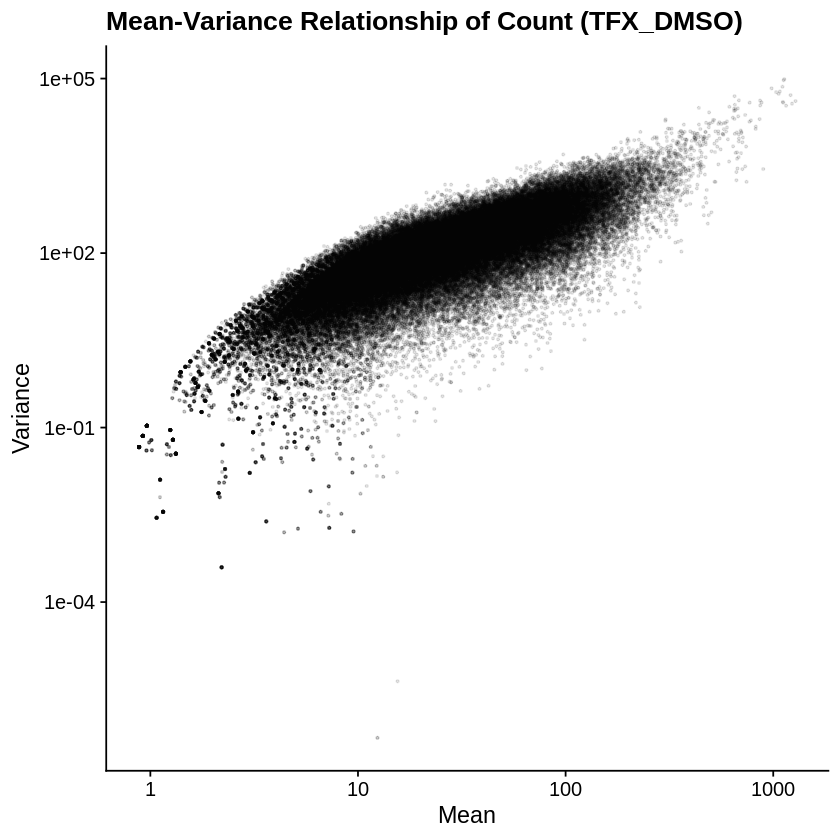

In [10]:
###
dat = dat_comb
dat = dat %>% dplyr::filter(Group=="TFX_DMSO")

###
set.seed(123)
dat = dat %>% dplyr::sample_n(size=100000)

###
gpt = ggplot(dat, aes(x=Cnt_Mean, y=Cnt_Var)) + 
    geom_point(size=0.5, alpha=0.1) + 
    scale_x_log10() + 
    scale_y_log10() +
    theme_cowplot() + 
    labs(x="Mean", y="Variance", title="Mean-Variance Relationship of Count (TFX_DMSO)")

options(repr.plot.height=7, repr.plot.width=7)
print(gpt)

In [11]:
head(dat)

Chrom,Start,End,4_pct_at,5_pct_gc,6_num_A,7_num_C,8_num_G,9_num_T,10_num_N,⋯,12_seq_len,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std,Log_Cnt_Mean,Log_Cnt_Var
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,20740800,20741800,0.661,0.339,324,172,167,337,0,⋯,1000,TFX_DMSO,0.3808039,0.003587426,0.05989513,12.19087,3.676629,1.917454,1.086035,0.5654498
chr17,14775600,14776600,0.564,0.436,294,240,196,270,0,⋯,1000,TFX_DMSO,2.0247328,0.068808176,0.26231313,64.81882,70.519120,8.397566,1.811701,1.8483069
chr17,13718400,13719400,0.602,0.398,310,197,201,292,0,⋯,1000,TFX_DMSO,0.4711558,0.092271148,0.30376166,15.08336,94.565509,9.724480,1.178498,1.9757328
chr17,82440100,82441100,0.414,0.586,212,294,292,202,0,⋯,1000,TFX_DMSO,3.5138814,0.963751323,0.98170837,112.49171,987.715405,31.427940,2.051121,2.9946318
chr17,28670400,28671400,0.573,0.427,276,215,212,297,0,⋯,1000,TFX_DMSO,0.8792969,0.070406750,0.26534270,28.14939,72.157443,8.494554,1.449469,1.8582811
chr17,48108600,48109600,0.520,0.480,212,230,250,308,0,⋯,1000,TFX_DMSO,1.2177473,0.161741730,0.40217127,38.98438,165.763507,12.874918,1.590891,2.2194889


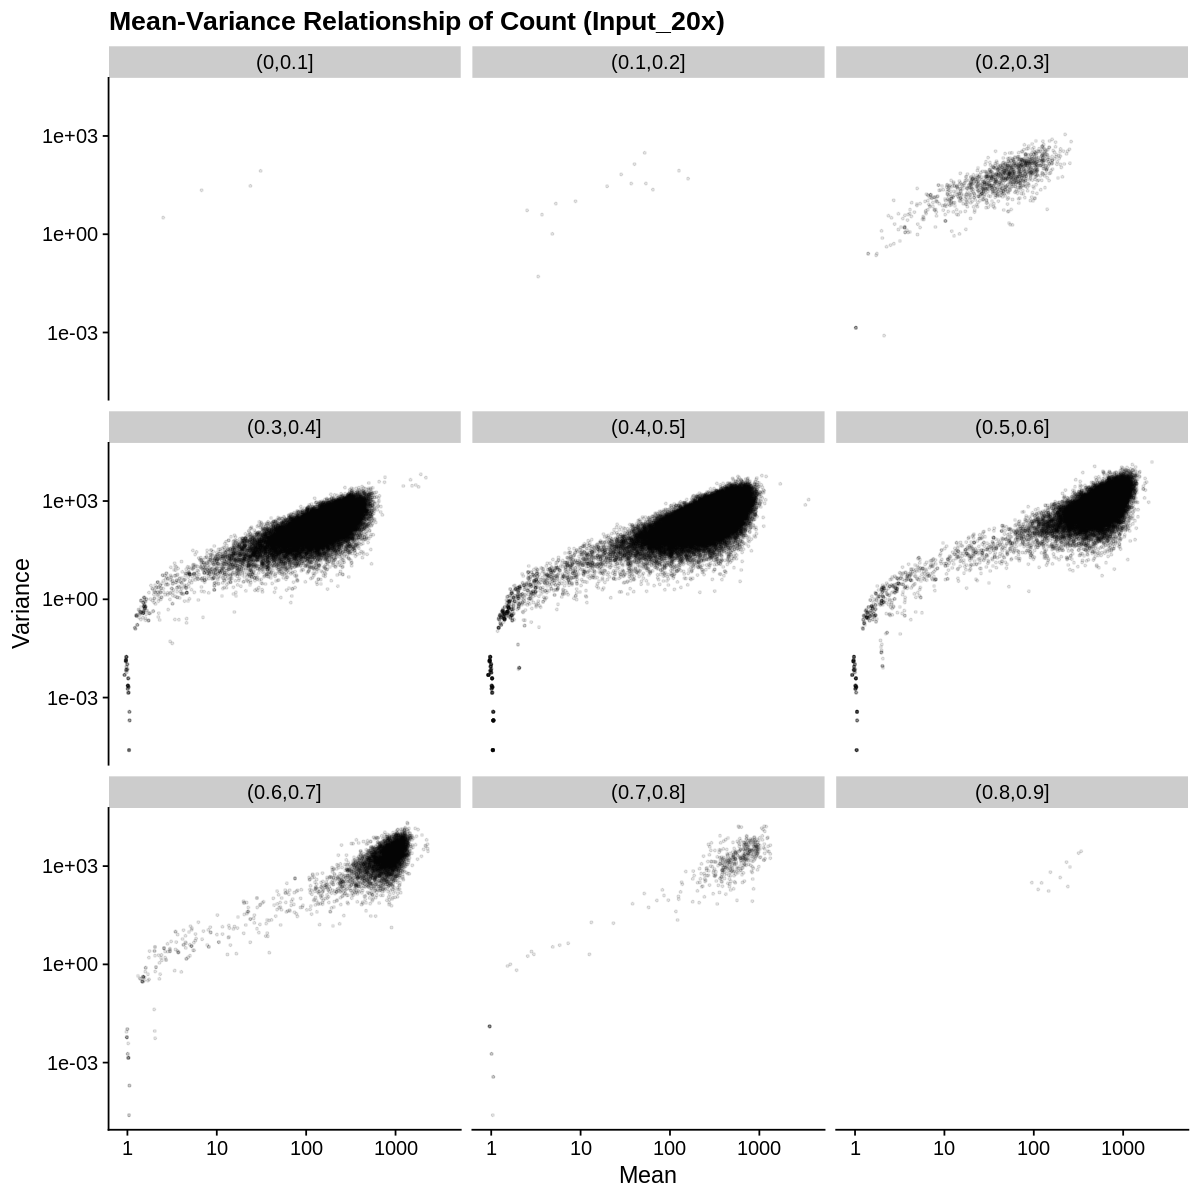

In [25]:
###
dat = dat_comb
dat = dat %>% dplyr::filter(Group=="Input_20x")

###
set.seed(123)
dat = dat %>% dplyr::sample_n(size=100000)

###
gpt = ggplot(dat, aes(x=Cnt_Mean, y=Cnt_Var)) + 
    geom_point(size=0.5, alpha=0.1) + 
    scale_x_log10() + 
    scale_y_log10() +
    theme_cowplot() + 
    facet_wrap(~grp_gc) +
    labs(x="Mean", y="Variance", title="Mean-Variance Relationship of Count (Input_20x)")

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

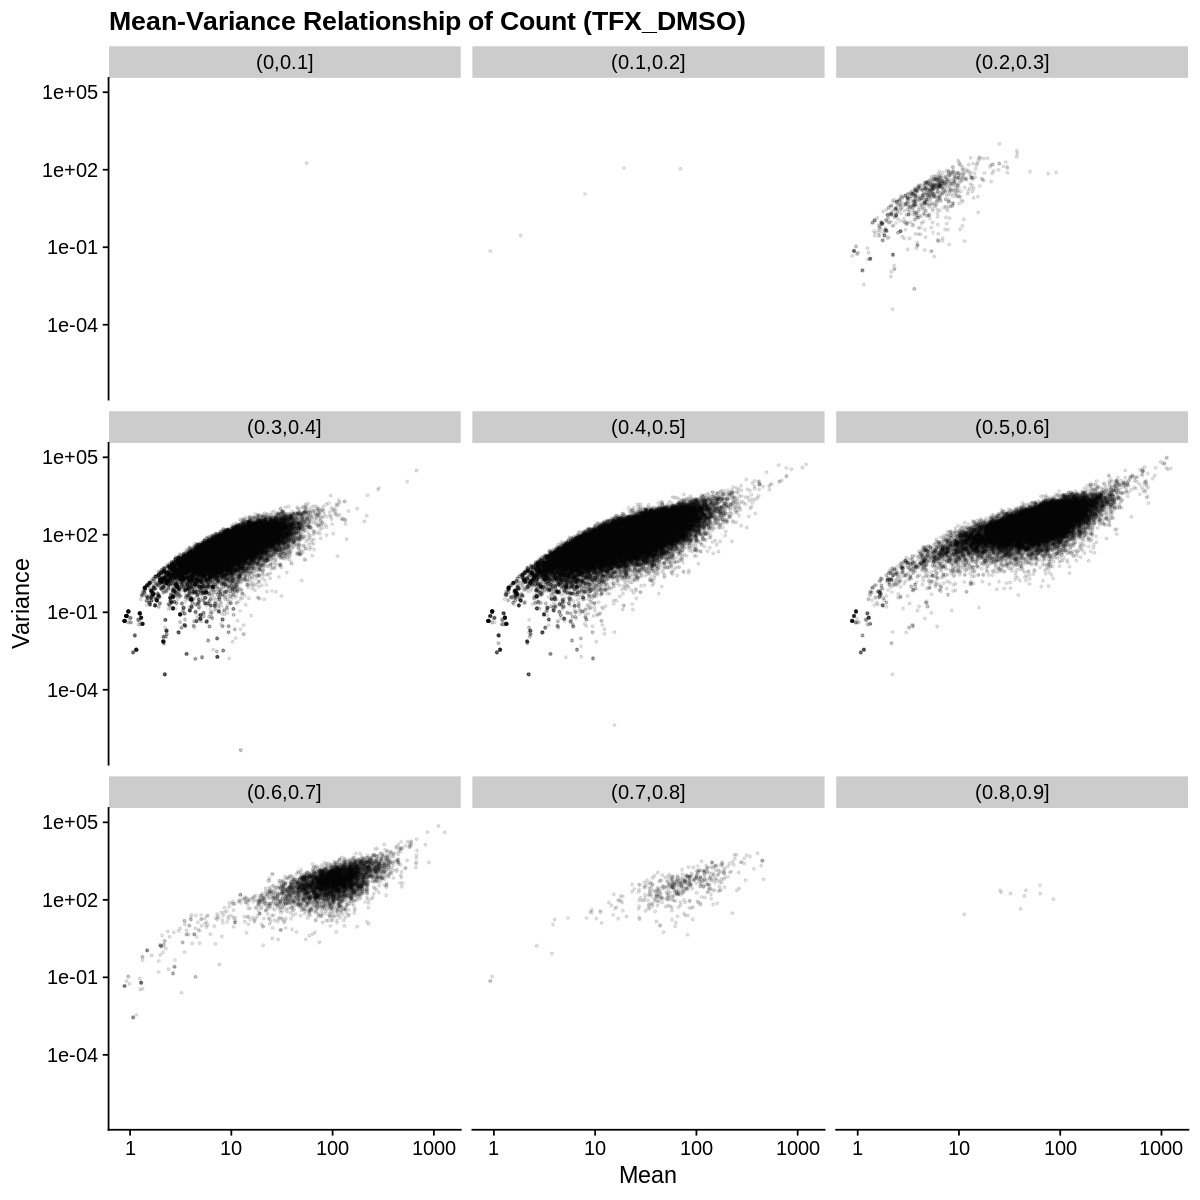

In [29]:
###
dat = dat_comb
dat = dat %>% dplyr::filter(Group=="TFX_DMSO")

###
set.seed(123)
dat = dat %>% dplyr::sample_n(size=100000)

###
gpt = ggplot(dat, aes(x=Cnt_Mean, y=Cnt_Var)) + 
    geom_point(size=0.5, alpha=0.1) + 
    scale_x_log10() + 
    scale_y_log10() +
    theme_cowplot() + 
    facet_wrap(~grp_gc) +
    labs(x="Mean", y="Variance", title="Mean-Variance Relationship of Count (TFX_DMSO)")

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)